# Assignment 2
### Normal Distribution, Sampling & Confidence

### Dataset

Breakout is a fun arcade game by *Atari Inc.* from 1976 where you control a small paddle that can move sideways at the bottom of the screen. The goal is to bounce a ball back upwards against placed bricks. Each brick that is broken awards the player with some points. When all bricks are cleared, the player advances to the next level. Whenever the ball is not returned, the player loses a life and can try again in the same level. When all lives are lost, the game is over.

Two friends play this game simultaneously, and define winning as having a higher score than the other person. All the games these two friends ever played together are collected in this dataset. 

Let's start by loading the toolboxes we need and uploading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_style("whitegrid")

In [ ]:
### needed/convenient only if you're working in Google colab (not for local Jupyter notebook):
# from google.colab import files
# uploaded = files.upload()

In [ ]:
breakout_score = pd.read_csv("Breakout.csv")
breakout_score.head()

,score_1,wins_1,score_2,wins_2
0,16500,L,19400,W
1,18600,L,21100,W
2,27100,W,25400,L
3,19800,L,26800,W
4,12600,L,16600,W


In this workgroup, we will focus only on the scores of player 1 which you can find in the variable `score_1`. Each row represents the score of one game.

### Exercise 1

How often did player 1 play the game? <div style='text-align: right;'>**1 point**</div>

In [ ]:
# your code/answer here
#print(breakout_score["score_1"])
print("Player 1 played the game", len(breakout_score["score_1"]), "times")

Player 1 played the game 1000 times


#### Normal distribution

Before we are going to analyze the data, it is important to see how the data is distributed, or more importantly, if it is normally distributed or not.

### Exercise 2

Plot the distributions of the scores of this player, and describe the distribution. Do you think the data are normally distributed? (hint: use a histplot) <div style='text-align: right;'>**2 points**</div>

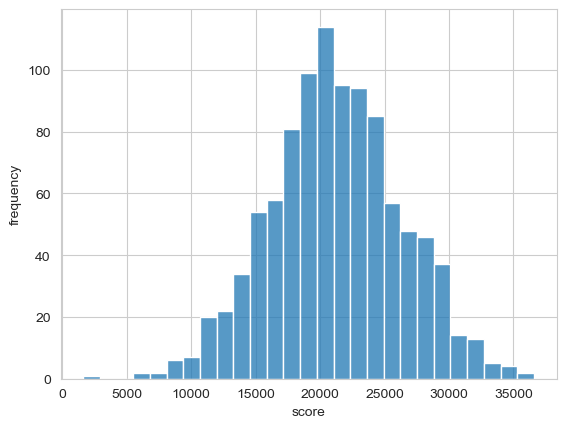

In [ ]:
# your code/answer here
sns.histplot(breakout_score["score_1"])
plt.xlabel("score")
plt.ylabel("frequency")
plt.show()

#Answer
#This is nearly normally distributed.

#### Normal probability

Once we decide that a variable is approximately normal, we can use our knowledge about the normal distribution to answer all sorts of questions about that variable related to probability. Take, for example, the question "*what is the probability that this player scores 20000 or less in a particular game?*"

To answer this question, we compute the z-score, which tells us something about how far a data point is from the mean. Then we use a z-table to convert this z-score to a probability. 

In Python, this can be done in one step with the function `stats.norm.cdf()`:

In [ ]:
mean = breakout_score['score_1'].mean()
std = breakout_score['score_1'].std()
score = 20000
norm.cdf(score, mean, std)

0.4075083828254088

This means that this player scores less than 20000 points with a probability of 0.408. 

We can compare this probability to the empirical probability. We simply need to determine how many observations fall below 20000 then divide this number by the total sample size.

In [ ]:
sum(breakout_score['score_1'] <= score) / len(breakout_score)

0.411

Although the probabilities are not exactly the same, they are reasonably close. The closer the distribution is to being normal, the more accurate the theoretical probabilities will be.

### Exercise 3

The average score of all players online is 21500. What is the probability that, in a particular game, player 1 scores higher than this online average? Use the normal approximation to compute this probability. When printing out the result from any calculation, include some verbal description of what the numbers mean.  <div style='text-align: right;'>**2 points**</div>

In [ ]:
# your code/answer here
#Probability that player1 can exceed 21500.
#Assuming a normal distribution, z-score → use cumulative probability (cdf)

mean = breakout_score["score_1"].mean()
std = breakout_score["score_1"].std()

target_score = 21500
probability = norm.cdf(target_score,mean,std) #Calculate less prob
result = 1 -probability #Calculate greater prob

print(result)

print("Probability that player1's socre is higher than 21500 is ",round(result*100,2), "%")

0.476756853820102
Probability that player1's socre is higher than 21500 is  47.68 %


#### Sampling

In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

We can use the following command to sample 30 observations from the population:

In [ ]:
samp = breakout_score['score_1'].sample(30)

### Exercise 4

Have a look at the distribution of the sampled data by making another displot or histplot. Describe how it differs from the population distribution. And how does that change when you draw a larger sample of 100 scores? <div style='text-align: right;'>**3 points**</div>

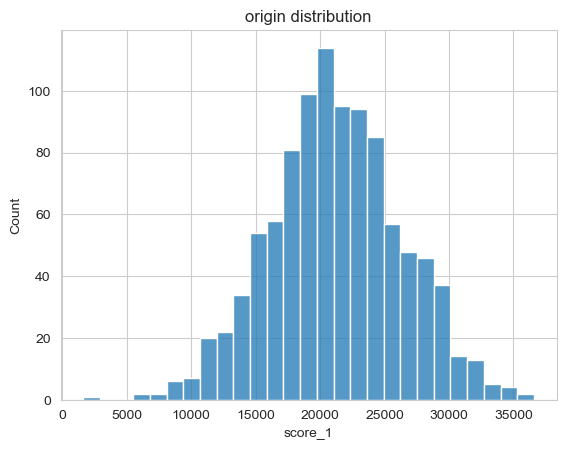

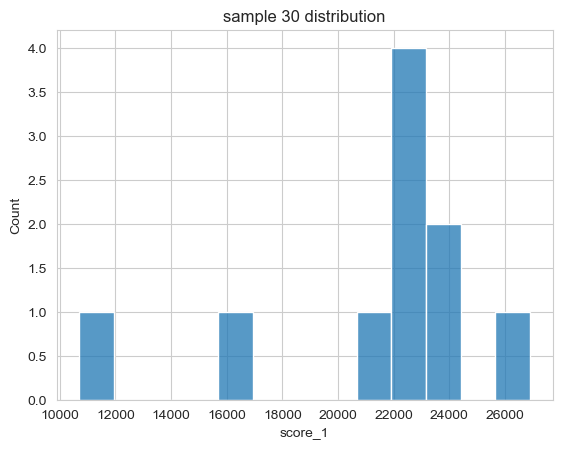

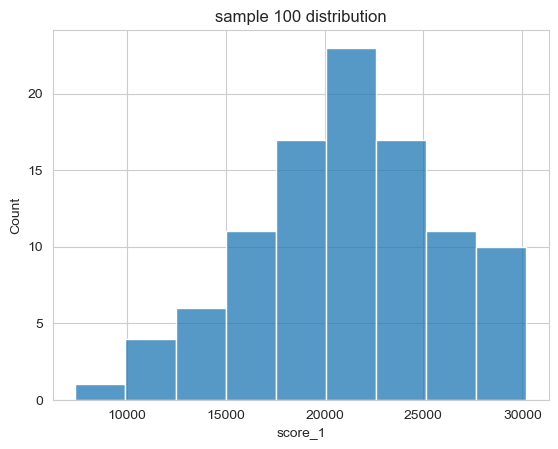

In [ ]:
# your code/answer here

origin = breakout_score['score_1']
sample_30 = breakout_score['score_1'].sample(10)

sample_100 = breakout_score['score_1'].sample(100)

sns.histplot(origin)
plt.title("origin distribution")
plt.show()
sns.histplot(sample_30)
plt.title("sample 30 distribution")
plt.show()
sns.histplot(sample_100)
plt.title("sample 100 distribution")
plt.show()

#Answer
#With small samples (30), the distribution can look very different from Origin.
#The values will be more biased towards a particular range.

#However, when the sample size is increased to 100, the distribution becomes closer to Origin.
#The larger the sample size may be the more accurate and it appears to reflect characteristics such as mean, variance and shape.

### Exercise 5

Let's recompute our estimate for the probability that in a particular game player 1 scores higher than the online average. 

1. Does the probability differ from the probability observed in the population? 
2. Which sample estimate (30 or 100 participants) is closer to the population estimate?
3. Do your observations from 1. and 2. above hold for every random sample (repeat the sampling multiple times)?<div style='text-align: right;'>**4 points**</div>

Probability that player1's socre is higher than the online average of 21500 based on a sample of 30 is 42.76 %
Probability that player1's socre is higher than the online average of 21500 based on a sample of 100 is 52.24 %
Probability that player1's socre is higher than the online average of 21500 based on the population is 47.68 %


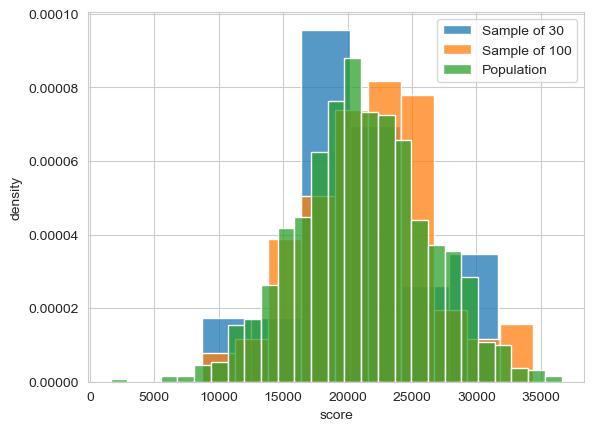

In [ ]:
# your code/answer here

# Origin
mean = breakout_score["score_1"].mean()
std = breakout_score["score_1"].std()
target_score = 21500
probability = norm.cdf(target_score,mean,std) #Calculate less prob
result = 1 - probability #Calculate greater prob

text = "Probability that player1's socre is higher than the online average of 21500 based on"

sample_list = [30, 100, 1000]

for sample_size in sample_list:
    sample = breakout_score['score_1'].sample(sample_size) #random_state=1 to fix the seed
    mean_sample = sample.mean() # we need to remove ["score_1"] since the sample only consists of the score
    std_sample = sample.std()
    probability_sample = norm.cdf(target_score,mean_sample,std_sample) # Calculate less prob
    result_sample = 1 - probability_sample # Calculate greater prob
    # Plot the graph
    if sample_size != 1000:
        # plt.title(f"Sample size {sample_size}") # to show the plots seperately
        sns.histplot(sample, stat="density", label=f"Sample of {sample_size}")
    else:
        # plt.title("Original Distribution") # to show the plots seperately
        sns.histplot(breakout_score["score_1"], stat="density", label="Population")
    plt.xlabel("score")
    plt.ylabel("density")
    plt.legend()
    # plt.show() # to show the plots seperately
    # Print the probability
    if sample_size != 1000:
        print(text, f"a sample of {sample_size} is", round(result_sample*100,2), "%")
    else:
        print(text, f"the population is", round(result_sample*100,2), "%")

# Answers:
# 1. With n = 30 the probability is often noticablily different from the true population due to the small sample size. This becomes a lot better when using a larger sample size of n = 100.
# 2. The sample estimate of 100 participants is almost always closer to the true population.
# 3. There is a chance it might not be true in a rare case, but in general the observations hold.

# Notes:
# Samples with 100 scores have a rather uneven distribution due to the small sample size, resulting in random variation.
# However, a sample of 100 scores shows a smoother distribution that more closely resembles the shape of the population.
# As the sample size increases, the sample distribution is found to be more stable.

### Exercise 6

Every time we take another random sample, we get a different distribution and a different estimate.   It's useful to get a sense of just how much variability we should expect when estimating the population proportion this way. The distribution of sample probabilities, called the sampling distribution, can help us understand this variability. We can build up the sampling distribution for the population proportion by repeating the above steps many times. 

1. Create 5000 samples of size 30 and size 100 of the player's scores (hint: create empty numpy arrays and fill those with values in your for-loop). 
2. For each sample, compute the probability under the normal distribution that this player outperforms the average player. 
3. Save the values in each sample and show them in a histogram (you can use the histplot again). Make one histogram per sample size and make sure the x-axes are equal! 
4. How do the center and the spread of your sample distribution change when your sample size increases? <div style='text-align: right;'>**6 points**</div>

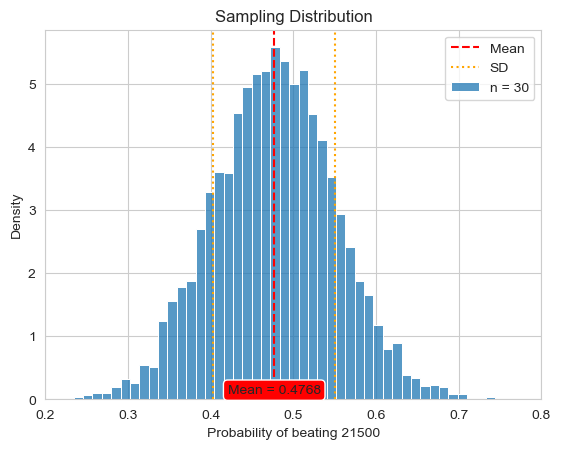

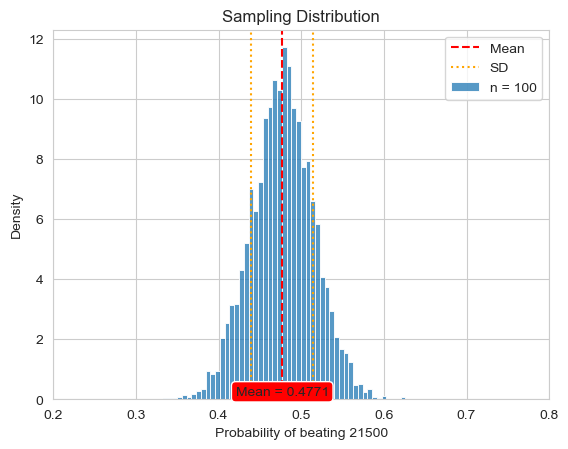

For both sampling distributions, the mean is near the 'true' probability.  
However, the distribution will be more tightly clustered around the mean for the higher sampling size.  
This is because, for a smaller sample size, there is more variation resulting in a wider spread.  
The standard deviation is also larger for a lower sampling size.


In [ ]:
# your code/answer here
# Question 1, 2, 3 & 4!

# origin population
population_mean = breakout_score["score_1"].mean()
population_std  = breakout_score["score_1"].std()
threshold_score = 21500

# sumulation number
n_simulations = 5000

# empty arr
probabilities_n30  = np.empty(n_simulations)
probabilities_n100 = np.empty(n_simulations)

for i in range(n_simulations):
    # random samples
    sample_n30  = breakout_score["score_1"].sample(30)
    sample_n100 = breakout_score["score_1"].sample(100)

    # compute mean and std
    mean_n30,  std_n30  = sample_n30.mean(),  sample_n30.std(ddof=1)
    mean_n100, std_n100 = sample_n100.mean(), sample_n100.std(ddof=1)

    # calculate probability of outperforming score
    cdf_n30  = norm.cdf(threshold_score, mean_n30, std_n30)
    cdf_n100 = norm.cdf(threshold_score, mean_n100, std_n100)

    probabilities_n30[i]  = 1 - cdf_n30
    probabilities_n100[i] = 1 - cdf_n100

# test visualize probabilities:
# plt.plot(probabilities_n30)
# plt.show()


xmin = 0.2
xmax = 0.8

# n = 30
arr_mean_30 = probabilities_n30.mean()
arr_std_30 = probabilities_n30.std()
plt.figure()
sns.histplot(probabilities_n30, stat="density", label="n = 30", kde=False)
plt.axvline(probabilities_n30.mean(), color="red", linestyle="--", label="Mean")
plt.axvline(arr_mean_30 + arr_std_30, color="orange", linestyle=":", label="SD")
plt.axvline(arr_mean_30 - arr_std_30, color="orange", linestyle=":")
plt.text(arr_mean_30, 0.05, f"Mean = {arr_mean_30:.4f}", ha="center", va="bottom", bbox=dict(boxstyle='round', facecolor='red')) 
plt.xlim(xmin, xmax)        # fix x axis
plt.xlabel("Probability of beating 21500")
plt.ylabel("Density")
plt.title("Sampling Distribution")
plt.legend()
plt.show()

# n = 100
arr_mean_100 = probabilities_n100.mean()
arr_std_100 = probabilities_n100.std()
plt.figure()
sns.histplot(probabilities_n100, stat="density", label="n = 100", kde=False)
plt.axvline(probabilities_n100.mean(), color="red", linestyle="--", label="Mean")
plt.axvline(arr_mean_100 + arr_std_100, color="orange", linestyle=":", label="SD")
plt.axvline(arr_mean_100 - arr_std_100, color="orange", linestyle=":")
plt.text(arr_mean_100, 0.05, f"Mean = {arr_mean_100:.4f}", ha="center", va="bottom", bbox=dict(boxstyle='round', facecolor='red')) 
plt.xlim(xmin, xmax)
plt.xlabel("Probability of beating 21500")
plt.ylabel("Density")
plt.title("Sampling Distribution")
plt.legend()
plt.show()

print(
f"""For both sampling distributions, the mean is near the 'true' probability.  
However, the distribution will be more tightly clustered around the mean for the higher sampling size.  
This is because, for a smaller sample size, there is more variation resulting in a wider spread.  
The standard deviation is also larger for a lower sampling size."""
)

#### Confidence intervals

Let's say we want to know what the average performance of our player is. If we have access to data from all games (population), it is straightforward to answer questions like this. When we only have sample data, we can approximate the mean of our population using our sample mean. That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This can be captured by using a confidence interval.

In the online lecture, you have seen how to calculate a confidence interval for probabilities. We can use a similar method to compute a confidence interval for numerical data. We can calculate a 95% confidence interval for a sample mean by adding and subtracting 1.96 standard errors to the point estimate (this is the z*–value). By computing confidence intervals, we can make inferences about what the population means. For numerical data, we can compute the standard error using the formula: SE = $\frac{\sigma}{\sqrt n}$

### Exercise 7

1. Write a function that takes a sample dataset and a z*–value as input and outputs the lower and the upper bound of the confidence interval.
2. Draw a sample of 30 scores and print the confidence interval. Does the confidence interval contain the population mean?
3. Now recompute the confidence interval for a sample of 200 scores. How does the interval change? Why is that?
4. Now change the confidence level to 99% (z*=2.58) for the 200 samples. How does that change your interval?
5. Draw 5000 samples of 50 scores and calculate the percentage of how often the 95% confidence interval contains the population mean. Is this number similar to what you would expect?<div style='text-align: right;'>**11 points**</div>

In [ ]:
# your code/answer here
#Answer1

#This function is that calculates the confidence interval from sample data and a z-value.

#General formula
#The confidence interval = sample mean ± (z-value * standard error)
#Standard error = sample standard deviation ÷ √sample size
#Lower bound of the confidence interval = mean − (z-value * standard error)
#Upper bound of the confidence interval = mean + (z-value * standard error)

def confidence_interval(sample, z_value):
    
    mean = sample.mean()
    std = sample.std()

    standard_error = std / np.sqrt(len(sample))

    lower = mean - (z_value* standard_error)
    upper = mean + (z_value * standard_error)

    #Ensure that a single number is returned
    if isinstance(lower, pd.Series):
        lower = lower.iloc[0]
    if isinstance(upper, pd.Series):
        upper = upper.iloc[0]

    return lower, upper

In [ ]:
# your code/answer here
#pick up random 30 samples
sample_30 = breakout_score["score_1"].sample(30)

#Calculate the population mean.
population_mean = breakout_score["score_1"].mean()

#z-score is 1.96 for 95%
z = 1.96

#calculates the 95% confidence interval
lower,upper = confidence_interval(sample_30,z)

print(f"Expected range: {lower}to{upper}")
print(f"population_mean is: {population_mean}")

#Check
if lower <= population_mean <= upper:
    print("within range")
else:
    print("out of range")


Expected range: 19327.247719514195to22939.41894715247
population_mean is: 21200.8
within range


In [ ]:
# your code/answer here

#new sample 200
sample_200 = breakout_score["score_1"].sample(200)
lower_200,upper_200 = confidence_interval(sample_200,z)

range_200 = upper_200 - lower_200

print(f"Expected range: {lower_200}to{upper_200}")
print(f"confidence_interval: {range_200}")

print(f"population_mean is: {population_mean}")

#Why interval change?
#When the sample size increases from 30 to 200 the denominator increases. 
#As a result, the standard error becomes smaller, which in turn leads to a narrower confidence interval.

Expected range: 20424.611666225235to21850.388333774765
confidence_interval: 1425.7766675495295
population_mean is: 21200.8


In [ ]:
# your code/answer here

#95% confidence_interval
z_95 = 1.96
#99% confidence_interval
z_99 = 2.58

#95%
lower_95, upper_95 = confidence_interval(sample_200,z_95)
range_95 = upper_95 - lower_95

#99%
lower_99, upper_99 = confidence_interval(sample_200,z_99)
range_99 = upper_99 - lower_99

print(f"Expected range(95): {lower_95}to{upper_95}")
print(f"Expected range(99): {lower_99}to{upper_99}")

#Change rate
rate = (range_99/range_95 -1) *100
print(f"Change rate : {rate}")

#Increasing the confidence level means that the interval must cover a wider range to ensure a higher probability of containing the population mean.
#In other words, in order to increase confidence, we may have to accept a decrease in precision.

Expected range(95): 20424.611666225235to21850.388333774765
Expected range(99): 20199.106172888318to22075.893827111682
Change rate : 31.63265306122478


In [ ]:
# your code/answer here
sample_5000 = 5000
sample_size = 50
z = 1.96
confidence_interval_list = []
count = 0

for i in range(sample_5000):
     #pick up 50 random sample 
     sample = breakout_score["score_1"].sample(sample_size)

     lower,upper = confidence_interval(sample,z)

     if lower <= population_mean <= upper:
          count += 1

print(f"total count : {count}")

percentage = (count/sample_5000) * 100

print(f"The proportion of confidence intervals contain population mean : {percentage}%")

#The results of 5,000 simulations yield a number close to 95%, 
#This demonstrates that repeated calculations contain the population mean approximately 95% of the time.

total count : 4746
The proportion of confidence intervals contain population mean : 94.92%


**Total number of points**: 1 + 2 + 2 + 3 + 4 + 6 + 11 = 29